In [2]:
!pip install klib

     |████████████████████████████████| 22.3 MB 66.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import klib

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/d2c/train.csv')

In [9]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/d2c/test.csv')

In [10]:
df.head()

,UNIQUE_IDENTIFIER,SEQUENCE_NO,STATUS_CHECK,CATEGORY_1,CATEGORY_2,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,DISCOUNT,DEPOSIT,DEPOSIT_NUMBER,DEPOSIT_2,WITHDRAW,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER,Y1,Y2
0,98481267304,1,0,M,B,1,0.00000,0.000000,0.0000,0.0,0.0,0.25,0.1,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.449287,101.369863
1,98481267304,2,0,M,B,1,0.13735,0.011550,0.0999,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,1.8,1.0,0.0,0.0,0.0,0.0,4.449287,101.369863
2,98481267304,3,0,M,B,1,0.15835,0.010425,0.0242,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.7,0.3,0.0,0.0,0.0,0.0,4.449287,101.369863
3,98481267304,4,0,M,B,1,0.44490,0.035850,0.2398,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,2.8,1.5,0.0,0.0,0.0,0.0,4.449287,101.369863
4,98481267304,5,0,M,B,1,0.00000,0.000000,0.0000,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.449287,101.369863


In [11]:
test.head()

,UNIQUE_IDENTIFIER,SEQUENCE_NO,STATUS_CHECK,CATEGORY_1,CATEGORY_2,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,DISCOUNT,DEPOSIT,DEPOSIT_NUMBER,DEPOSIT_2,WITHDRAW,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER
0,98481269471,1,0,M,D,1,5.975,0.90500,0.4100,0.0,2.0,5.5,0.3,1.0,0.0,0.0,9.8,1.4,0.2,0.0,0.0,0.0,0.0
1,98481269471,2,0,M,D,0,0.000,0.00000,0.0000,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,98481270499,1,1,M,D,1,0.050,0.00750,0.0850,0.0,0.0,1.0,0.1,1.0,0.0,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.0
3,98481270499,2,1,M,D,1,1.750,0.26250,1.0200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,1.2,0.0,0.0,0.0,0.0
4,98481272694,1,0,M,C,1,0.125,0.01875,0.0425,0.0,4.0,10.0,0.1,10.0,0.0,0.0,0.0,0.5,0.1,0.0,0.0,0.0,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246837 entries, 0 to 1246836
Data columns (total 25 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UNIQUE_IDENTIFIER         1246837 non-null  int64  
 1   SEQUENCE_NO               1246837 non-null  int64  
 2   STATUS_CHECK              1246837 non-null  int64  
 3   CATEGORY_1                1246837 non-null  object 
 4   CATEGORY_2                1246837 non-null  object 
 5   ACTIVE_YN                 1246837 non-null  int64  
 6   ENTRY                     1246837 non-null  float64
 7   REVENUE                   1246837 non-null  float64
 8   WINNINGS_1                1246837 non-null  float64
 9   WINNINGS_2                1246837 non-null  float64
 10  DISCOUNT                  1246837 non-null  float64
 11  DEPOSIT                   1246837 non-null  float64
 12  DEPOSIT_NUMBER            1246837 non-null  float64
 13  DEPOSIT_2                 1

In [13]:
df=klib.convert_datatypes(df)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246837 entries, 0 to 1246836
Data columns (total 25 columns):
 #   Column                    Non-Null Count    Dtype   
---  ------                    --------------    -----   
 0   UNIQUE_IDENTIFIER         1246837 non-null  int64   
 1   SEQUENCE_NO               1246837 non-null  int8    
 2   STATUS_CHECK              1246837 non-null  int8    
 3   CATEGORY_1                1246837 non-null  category
 4   CATEGORY_2                1246837 non-null  category
 5   ACTIVE_YN                 1246837 non-null  int8    
 6   ENTRY                     1246837 non-null  float32 
 7   REVENUE                   1246837 non-null  float32 
 8   WINNINGS_1                1246837 non-null  float32 
 9   WINNINGS_2                1246837 non-null  float32 
 10  DISCOUNT                  1246837 non-null  float32 
 11  DEPOSIT                   1246837 non-null  float32 
 12  DEPOSIT_NUMBER            1246837 non-null  float32 
 13  DEPOSIT_2   

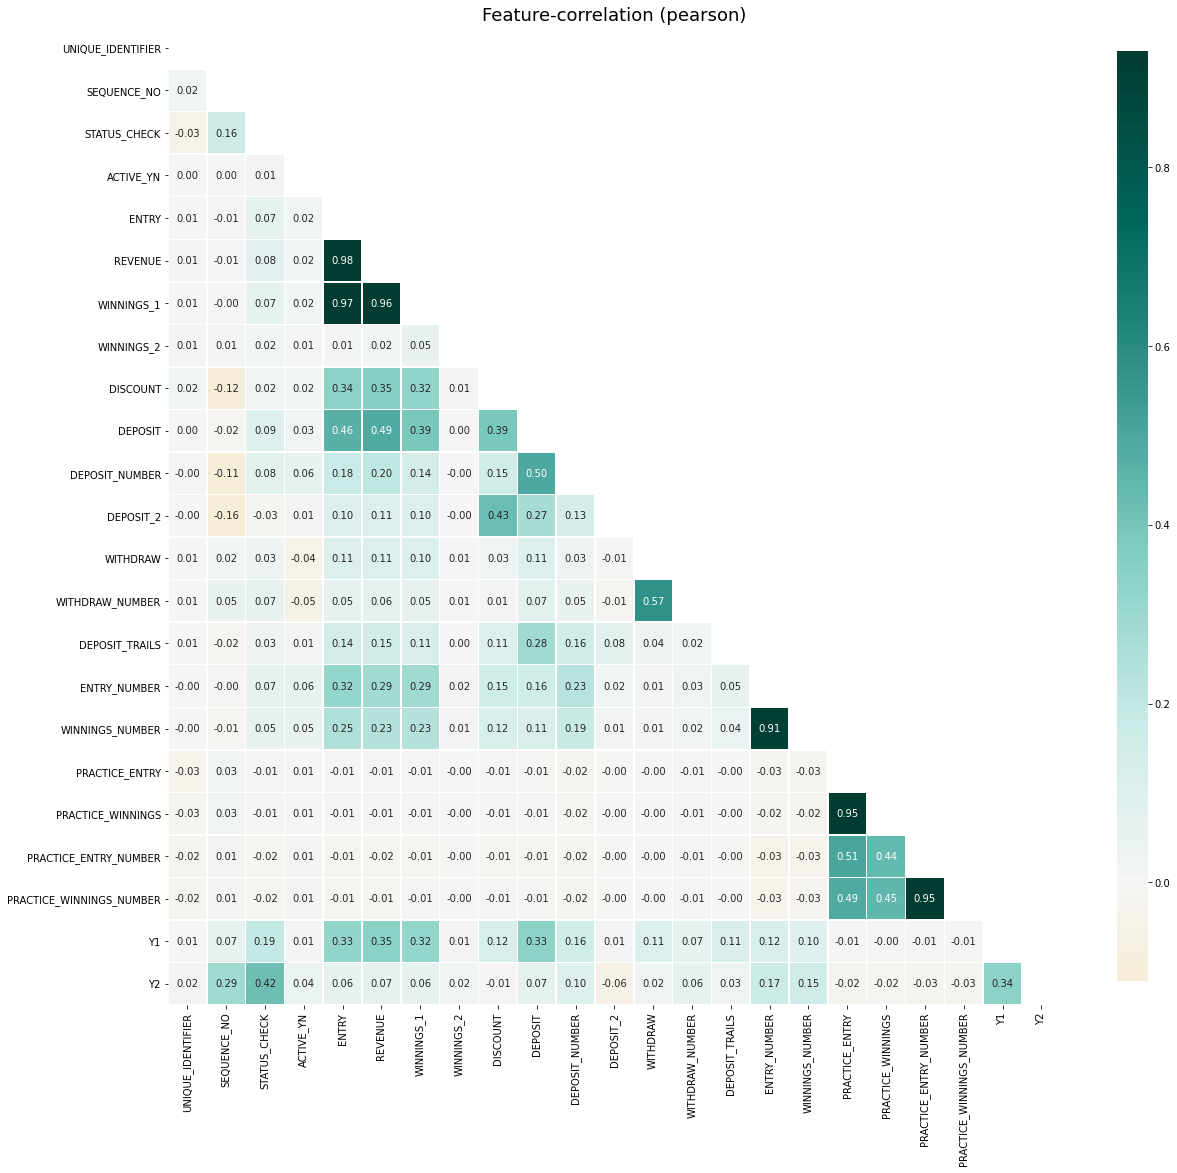

In [16]:
klib.corr_plot(df,figsize=(20,18))

In [80]:
df_try = df.copy()

In [81]:
df_try = df_try[['UNIQUE_IDENTIFIER', 'SEQUENCE_NO', 'STATUS_CHECK',
         'REVENUE','ACTIVE_YN',
       'WINNINGS_2', 'DEPOSIT',
       'WITHDRAW', 'DEPOSIT_TRAILS', 'ENTRY_NUMBER','Y1', 'Y2']]

In [82]:
df_try = df_try.groupby(by='UNIQUE_IDENTIFIER').median()

In [83]:
df_try.describe()

,SEQUENCE_NO,STATUS_CHECK,REVENUE,ACTIVE_YN,WINNINGS_2,DEPOSIT,WITHDRAW,DEPOSIT_TRAILS,ENTRY_NUMBER,Y1,Y2
count,96298.000000,96298.000000,96298.000000,96298.000000,96298.000000,96298.000000,96298.000000,96298.000000,96298.000000,96298.000000,96298.000000
mean,6.973842,0.279642,0.324882,0.995187,0.002566,0.476747,0.001317,0.056503,1.417505,5.363901,114.962006
std,5.139861,0.448826,1.483872,0.057603,0.058048,2.086946,0.138782,0.395059,2.448149,8.440128,185.299866
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.604128,0.000000
25%,2.000000,0.000000,0.006036,1.000000,0.000000,0.000000,0.000000,0.000000,0.200000,3.984064,8.219178
50%,5.500000,0.000000,0.051517,1.000000,0.000000,0.000000,0.000000,0.000000,0.600000,4.018940,27.397261
75%,12.000000,1.000000,0.181762,1.000000,0.000000,0.250000,0.000000,0.000000,1.500000,4.332848,131.506851
max,15.500000,1.000000,173.069672,1.000000,8.221399,75.000000,31.541361,20.200001,61.400002,834.063171,1000.000000


In [84]:
X = df_try.iloc[:,0:-2]
y = df_try.iloc[:,-2:]

# **Split Data**

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y.values, test_size=0.2,random_state=42,shuffle=True)

In [35]:
X_train.shape

(77038, 9)

In [24]:
y_train.shape

(77038, 2)

# **Build Model**

In [25]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.regularizers import l1_l2,l1

In [87]:
model = Sequential()
model.add(Dense(units=64, input_dim=9, activation='relu',activity_regularizer=l1(0.001)))
model.add(Dense(units=32, activation='relu',activity_regularizer=l1(0.001)))
#model.add(Dense(units=16, activation='relu',kernel_initializer='normal'))
model.add(Dense(2,kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [88]:
history = model.fit(X_train, y_train ,batch_size = 132, epochs = 150, validation_data=(X_test,y_test),verbose=1)

Epoch 1/150
584/584 [==============================] - 2s 3ms/step - loss: 12536.3271 - val_loss: 9449.4717
Epoch 2/150
584/584 [==============================] - 1s 2ms/step - loss: 8605.0908 - val_loss: 8603.2725
Epoch 3/150
584/584 [==============================] - 1s 2ms/step - loss: 8160.8110 - val_loss: 8359.6748
Epoch 4/150
584/584 [==============================] - 1s 2ms/step - loss: 8016.7988 - val_loss: 8258.9199
Epoch 5/150
584/584 [==============================] - 1s 2ms/step - loss: 7937.4531 - val_loss: 8169.1133
Epoch 6/150
584/584 [==============================] - 1s 2ms/step - loss: 7889.1235 - val_loss: 8127.5654
Epoch 7/150
584/584 [==============================] - 1s 2ms/step - loss: 7851.9165 - val_loss: 8080.3540
Epoch 8/150
584/584 [==============================] - 1s 2ms/step - loss: 7810.2622 - val_loss: 8055.7158
Epoch 9/150
584/584 [==============================] - 1s 2ms/step - loss: 7782.6172 - val_loss: 8040.0293
Epoch 10/150
584/584 [==============

In [90]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
pred = model.predict(X_test)
print(sqrt(mean_squared_error(y_test,pred)) )
print(r2_score(y_test,pred))

88.61950408294017
0.47482114659796704


Text(0.5, 1.0, 'Training and validation loss')

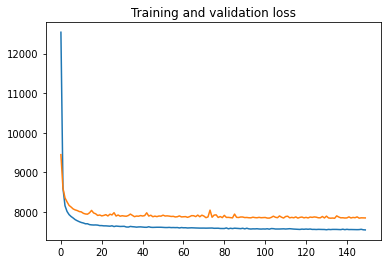

In [89]:
import matplotlib.pyplot as plt
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]
epochs   = range(len(loss))
plt.figure()
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


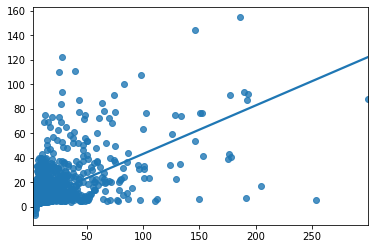

In [94]:
import seaborn as sns
sns.regplot(y_test[:,0],pred[:,0],ci=None)


# Test data

In [40]:
test=klib.convert_datatypes(test)
test['cat_1'] = test['CATEGORY_1'].cat.codes
test['cat_2'] = test['CATEGORY_2'].cat.codes

In [41]:
test_X = test[['UNIQUE_IDENTIFIER', 'SEQUENCE_NO', 'STATUS_CHECK',
         'REVENUE','ACTIVE_YN',
       'WINNINGS_2', 'DEPOSIT',
       'WITHDRAW', 'DEPOSIT_TRAILS', 'ENTRY_NUMBER']]

In [42]:
test_X = test_X.groupby(by='UNIQUE_IDENTIFIER').median()

In [43]:
pred = model.predict(test_X.values)

In [44]:
test_final = pd.DataFrame(pred,columns=['Y1','Y2'])

In [46]:
test_final['UNIQUE_IDENTIFIER'] = test_X.index

In [47]:
test_final = test_final[['UNIQUE_IDENTIFIER','Y1','Y2']]

In [48]:
test_final

,UNIQUE_IDENTIFIER,Y1,Y2
0,98481269471,2.417268,-4.259769
1,98481270499,4.271267,41.297520
2,98481272694,4.130105,61.153324
3,98481273365,4.069968,161.607178
4,98481278321,3.650874,16.689039
...,...,...,...
65237,98537204815,4.859625,475.628052
65238,98537204877,3.958731,2.374432
65239,98537204881,3.963684,38.522171
65240,98537205013,3.857271,89.258453


In [ ]:
test_final.to_csv('submit.csv',index=False)